# Questions
- What are the most common characteristics of the customers?
- How many clusters can be identified?
- What are the differences between the clusters?
- What are the similarities between the clusters?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set the tone for graph
sns.set()

# Load the data
df = pd.read_csv('C:/Users/DELL/Desktop/marketing projects/others/wholesale+customers/wholesale customers data.csv')

# View the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
print(df.shape)
print(df.info())
print(df.describe())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.00

The Fresh, Milk Grocery, Frozen, Detergents_Paper nd Delicassen columns seems to contain outliers. Using the John Tukey Fences, let's check the if there are truly outliers, by checking the percentage of outliers and plotting the graphs of the columns to see for sure

In [3]:
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicassen']
# Data Cleaning and Preparation
def find_outliers_perc(x):
    """returns the percentage of outliers in numerical columns of a datafrane"""
    for col in columns:
        lower = np.percentile(x[col], 25)
        higher = np.percentile(x[col], 75)
        IQR = higher - lower
        lower_fence = lower - 1.5 * IQR
        higher_fence = higher + 1.5 * IQR
        outliers = x[(x[col] > higher_fence) | (x[col] < lower_fence)]
        print(f'the outliers in {col} are {round(len(outliers[col])/len(x[col]),2)}%')
find_outliers_perc(df)


the outliers in Fresh are 0.05%
the outliers in Milk are 0.06%
the outliers in Grocery are 0.05%
the outliers in Frozen are 0.1%
the outliers in Detergents_Paper are 0.07%
the outliers in Delicassen are 0.06%


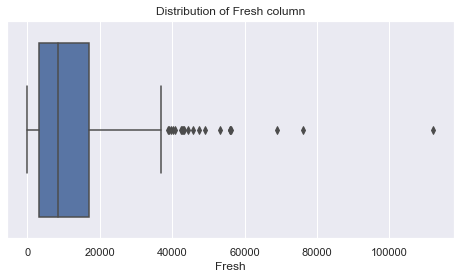

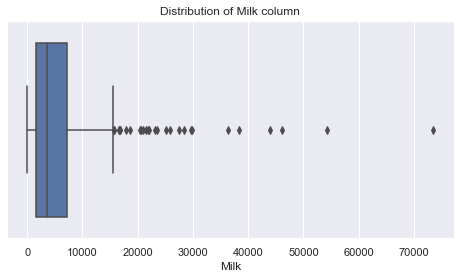

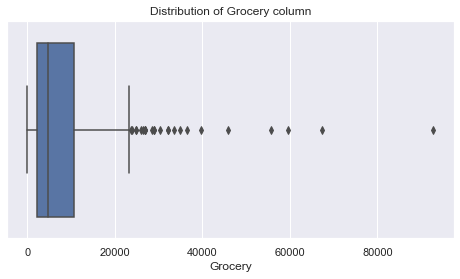

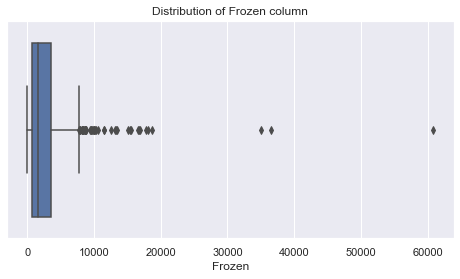

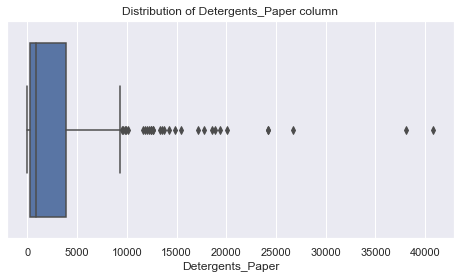

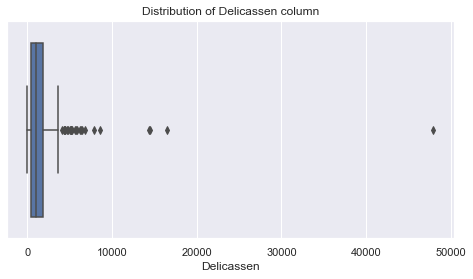

In [4]:
def plot_box(data):
    for col in columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=data, x=col)
        plt.title(f'Distribution of {col} column')
        plt.xlabel(f'{col}')
        plt.show()
        
plot_box(df)
        

Seeing that all the columns contain at least 5% of outliers, dropping outliers in any of this column could cause us to loose valuable data. So i will be imputing the values with either median, mean or using the winsorizing method. Before deciding on which method of imputing to use, i'll check how skewed the columns are. Criteria for choosing Imputation method:

impute using mean if skew value is between -1 and 1;
if skew value is between -2 and -1 or skew value is between 1 and 2, use median; 
Otherwise use the winsorizing method.

In [5]:
def check_skew(x,columns):
    """checks the skew of """
    for col in columns:
        skew = round(x[col].skew(),2)
        print(f'the {col} column has a skew value of {skew}')

check_skew(x=df, columns= columns)

the Fresh column has a skew value of 2.56
the Milk column has a skew value of 4.05
the Grocery column has a skew value of 3.59
the Frozen column has a skew value of 5.91
the Detergents_Paper column has a skew value of 3.63
the Delicassen column has a skew value of 11.15


Seeing that the skew values for all the columns are greater than 2, the capping method will be used.

In [6]:
def impute_median(x,columns):
    for col in columns:
        lower = np.percentile(x[col], 25)
        higher = np.percentile(x[col], 75)
        IQR = higher - lower
        lower_fence = lower - 1.0 * IQR
        higher_fence = higher + 1.0 * IQR
        x[col] = np.where(x[col] > higher_fence, higher_fence, np.where(x[col] < lower_fence, lower_fence, x[col]))
    return x
impute_median(x=df,columns=columns)
        

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.00,9656.0,7561.0,214.00,2674.00,1338.00
1,2,3,7057.00,9810.0,9568.0,1762.00,3293.00,1776.00
2,2,3,6353.00,8808.0,7684.0,2405.00,3516.00,3232.25
3,1,3,13265.00,1196.0,4221.0,6366.25,507.00,1788.00
4,2,3,22615.00,5410.0,7198.0,3915.00,1777.00,3232.25
...,...,...,...,...,...,...,...,...
435,1,3,29703.00,12051.0,16027.0,6366.25,182.00,2204.00
436,1,3,30739.75,1431.0,764.0,4510.00,93.00,2346.00
437,2,3,14531.00,12847.5,19158.5,437.00,7587.25,1867.00
438,1,3,10290.00,1981.0,2232.0,1038.00,168.00,2125.00


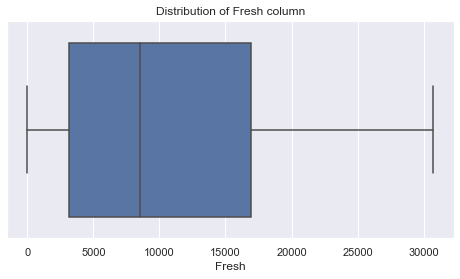

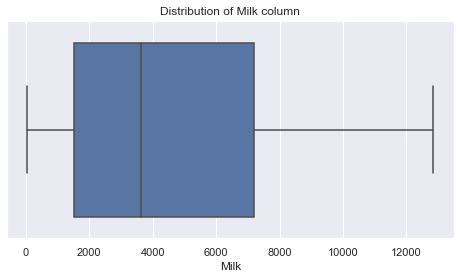

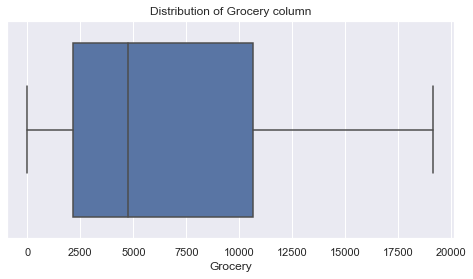

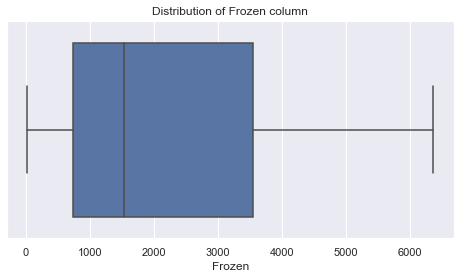

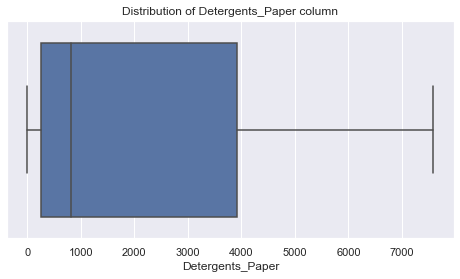

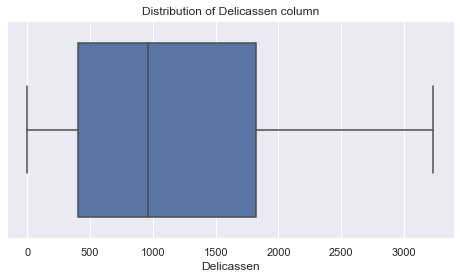

In [7]:
plot_box(df)

Now, Let's check the summary statistics again

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,10956.490909,4839.607955,6924.106818,2352.697159,2243.980682,1219.088068
std,0.468052,0.774272,9269.713277,3919.943205,5896.355994,2090.898006,2611.757063,975.199257
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,30739.750000,12847.500000,19158.500000,6366.250000,7587.250000,3232.250000


Now let's check the correlation between the numeric variables

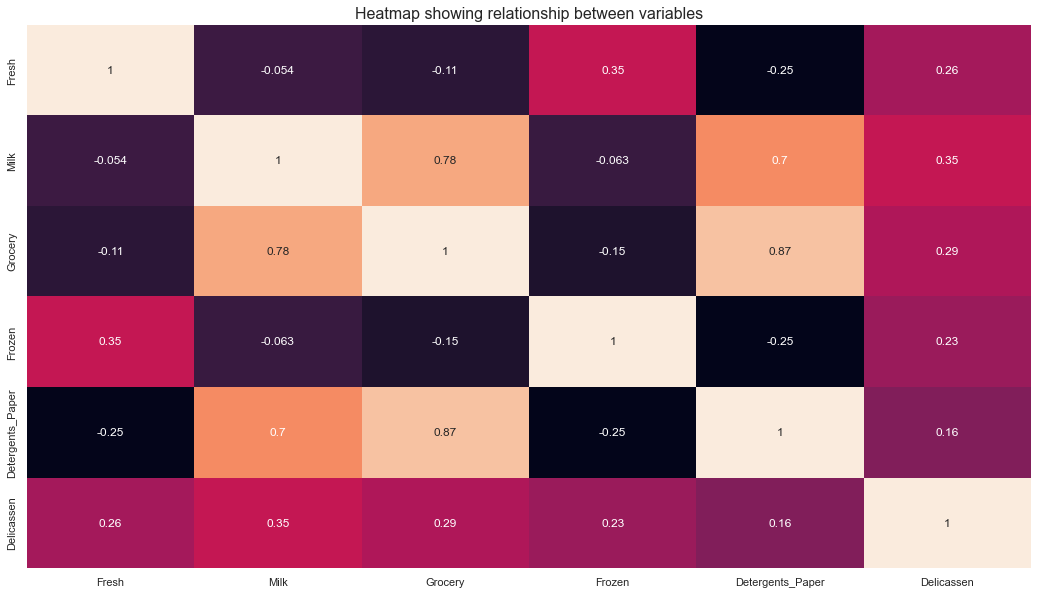

In [9]:
numer_col = df[columns]
plt.figure(figsize=(18,10))
sns.heatmap(numer_col.corr(),annot=True, fmt='.2g',cbar=False)
plt.title('Heatmap showing relationship between variables', fontsize=16)
plt.show()

Grocery and Detergent_paper (0.87), Grocery and Milk (0.78) and Milk and Detergent_Paper (0.7) are the only strong positively corellated variables. Now let's try to answer the question, what are the common characteristics of customers.

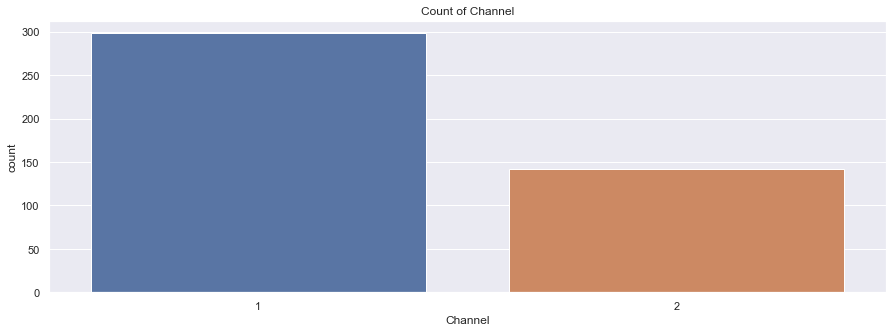

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Channel')
plt.title('Count of Channel')
plt.xlabel('Channel')
plt.show()

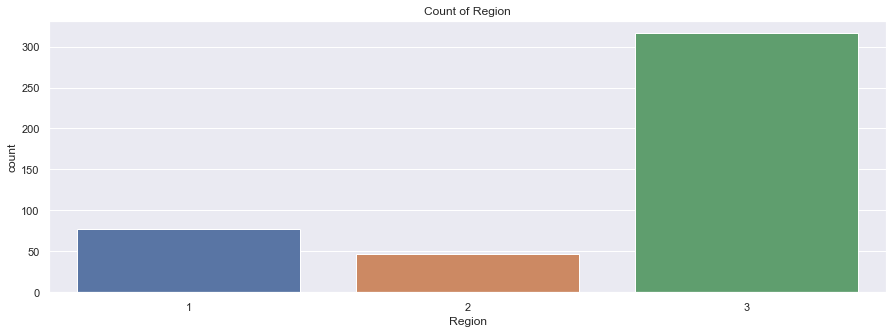

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Region')
plt.title('Count of Region')
plt.xlabel('Region')
plt.show()

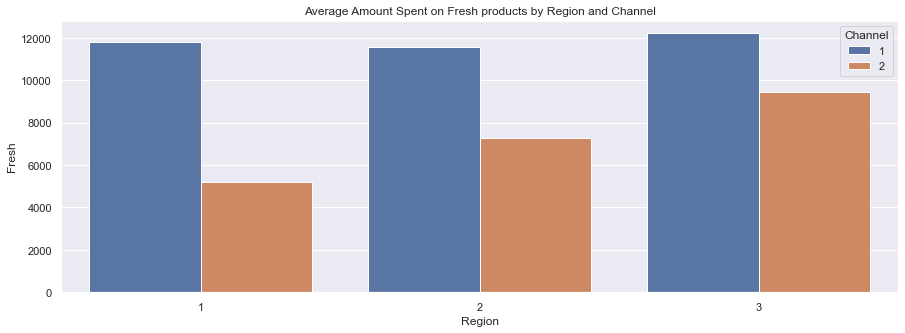

In [12]:
grouped = df.groupby(['Region','Channel'], as_index=False)['Fresh'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x= 'Region', y='Fresh',hue='Channel')
plt.title('Average Amount Spent on Fresh products by Region and Channel')
plt.show()

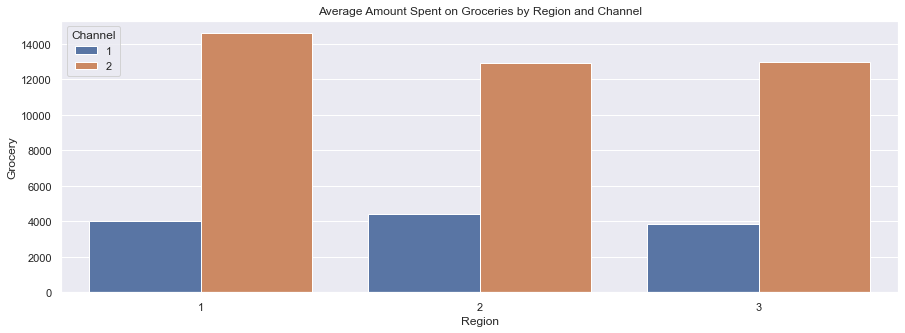

In [13]:
grouped = df.groupby(['Region','Channel'], as_index=False)['Grocery'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x= 'Region', y='Grocery',hue='Channel')
plt.title('Average Amount Spent on Groceries by Region and Channel')
plt.show()

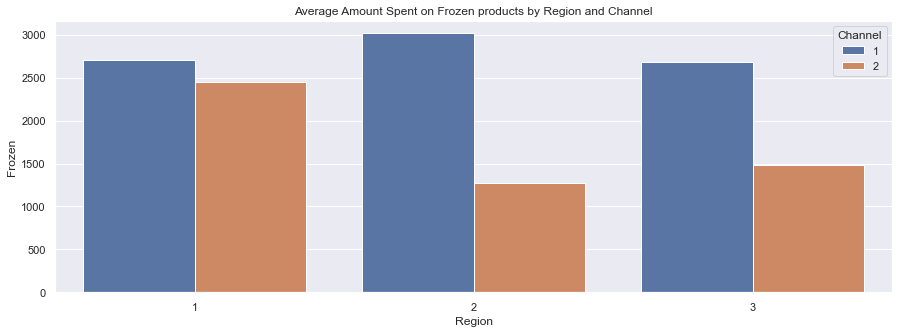

In [14]:
grouped = df.groupby(['Region','Channel'], as_index=False)['Frozen'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x= 'Region', y='Frozen',hue='Channel')
plt.title('Average Amount Spent on Frozen products by Region and Channel')
plt.show()

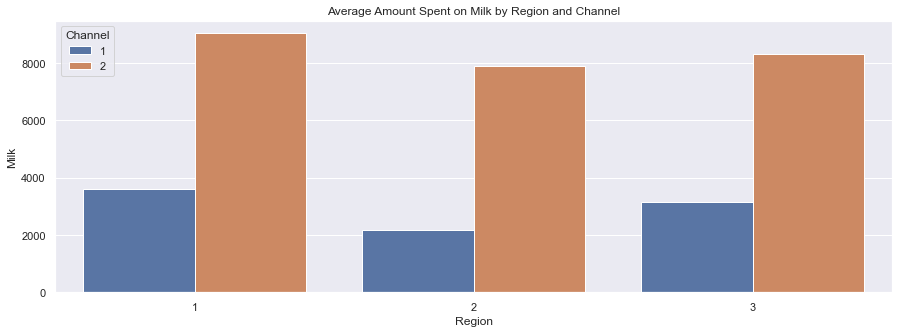

In [15]:
grouped = df.groupby(['Region','Channel'], as_index=False)['Milk'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x= 'Region', y='Milk',hue='Channel')
plt.title('Average Amount Spent on Milk by Region and Channel')
plt.show()

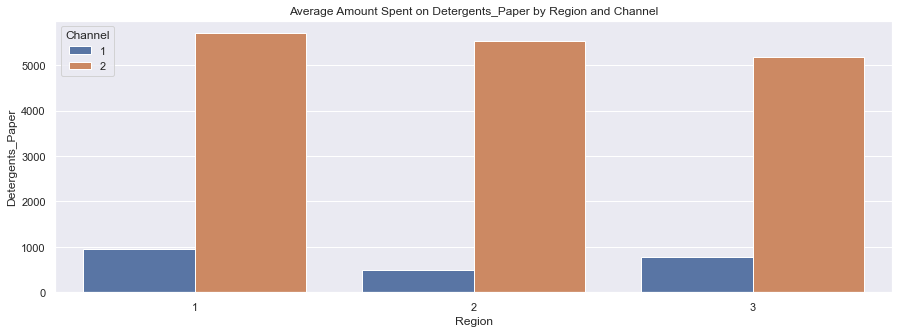

In [16]:
grouped = df.groupby(['Region','Channel'], as_index=False)['Detergents_Paper'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x= 'Region', y='Detergents_Paper',hue='Channel')
plt.title('Average Amount Spent on Detergents_Paper by Region and Channel')
plt.show()

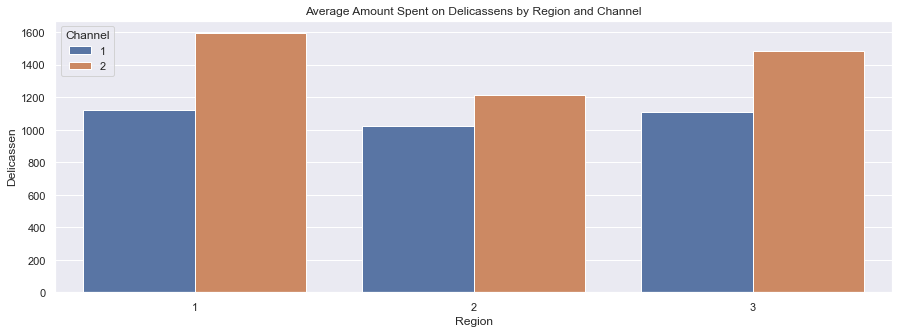

In [17]:
grouped = df.groupby(['Region','Channel'], as_index=False)['Delicassen'].mean()
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x= 'Region', y='Delicassen',hue='Channel')
plt.title('Average Amount Spent on Delicassens by Region and Channel')
plt.show()

# Common Characteristics of Customers

- Channel 1 is the most popular channel for all customers
- Store in Region 3 is also the most patronized by customers
- Customers from all region spends more on average on Channel 1 when buying Fresh products
- Customers from all reion spends more on average  on Channel 2 when buying Groceries 
- Customers from all region spends more on average on Channel 1 when buying Frozen products
- Customers from all reion spends more on average  on Channel 2 when buying Milk
- Customers from all reion spends more on average  on Channel 2 when buying Delicassen
- Customers from all reion spends more on average  on Channel 2 when buying Detergents paper

Now that we have identified the common characteristics of our ccustomer, lets find the optimal Number of Clusters using the Elbow Plot.Before plotting, let us reduce the number of features to two using the PCA. this makes sure that variables that are highly correlated are merged.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


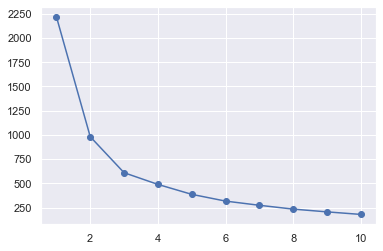

In [18]:
from sklearn.decomposition import PCA
# Scale the Data
ss = StandardScaler()
scaled_data = ss.fit_transform(df)
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(scaled_data)
inertia = []
ranges = range(1,11)
for k in ranges:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_pca)
    inertia.append(km.inertia_)
plt.plot(ranges, inertia, 'o-')
plt.show()
    

# Based on the Elbow method, The optimal number of clusters is 3.

3 is then specified as our n_cluster.

In [19]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(data_pca)
labels = km.labels_
centroids = km.cluster_centers_
print(labels)

[0 0 0 1 1 0 2 0 2 0 0 2 0 0 0 2 0 1 0 2 1 2 1 0 0 0 2 2 0 1 1 2 2 1 2 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 2 2 1 0 1 2 0 0 2 2 0 0 0 0 2 0 2 0 1 2 1 1 2 1
 0 1 2 0 2 2 2 0 0 2 2 0 0 1 2 1 2 1 0 1 0 2 0 2 2 2 0 0 0 1 2 2 0 0 0 0 2
 0 1 1 2 2 2 2 1 2 2 2 2 0 1 1 1 0 2 1 2 2 2 2 2 2 1 2 1 2 1 1 1 2 2 0 2 2
 2 1 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 2 0 2 0 1 1 2 1 1 1 0 1 2
 2 2 2 0 0 1 2 2 0 2 1 1 0 2 2 0 0 1 2 2 0 2 0 2 0 1 0 2 2 0 0 0 2 0 2 2 2
 2 2 2 2 0 2 2 1 1 2 2 2 1 2 2 1 2 1 1 1 2 2 0 0 2 2 2 2 2 0 1 1 1 1 2 2 1
 1 2 2 2 2 0 1 0 1 0 2 2 2 2 1 2 2 1 2 1 0 2 0 1 1 1 2 2 1 2 2 2 2 2 0 1 2
 2 2 0 2 0 0 0 0 0 0 0 2 2 0 1 1 0 2 2 0 2 2 2 0 2 2 2 2 1 1 2 2 1 2 2 0 1
 0 1 0 2 1 2 1 0 0 2 0 2 2 0 0 2 0 2 0 2 0 1 2 2 0 1 2 2 2 2 2 2 0 2 2 2 2
 1 1 2 0 2 2 0 1 2 2 1 1 1 2 1 2 2 2 2 2 2 2 2 1 2 2 0 1 2 2 2 1 2 2 1 2 1
 0 2 1 2 2 2 1 2 0 0 2 0 2 0 0 2 2 0 1 0 1 2 2 2 1 2 2 2 1 1 0 2 2]


Now, lets Plot to visuallly see the clusters and their centroids

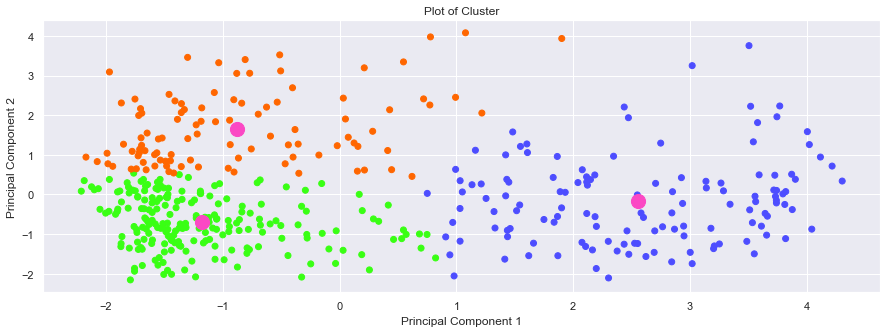

In [20]:
colors = ['#FF6600' if c==1 else '#39FF14' if c==2 else '#4D4DFF' for c in labels]
x = [c[0] for c in centroids]
y = [c[1] for c in centroids]
plt.figure(figsize=(15,5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=colors)
plt.scatter(x, y, c='#FB48C4', marker='o', s=200)
plt.title('Plot of Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Finding Similarity and DIfferences between the Clusters
Before identifying the similarities and differences between clusters, let' s add the predicted labels to our dataframe.

In [21]:
# Add the labels to the data
df['labels'] = labels
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669.0,9656.0,7561.0,214.00,2674.0,1338.00,0
1,2,3,7057.0,9810.0,9568.0,1762.00,3293.0,1776.00,0
2,2,3,6353.0,8808.0,7684.0,2405.00,3516.0,3232.25,0
3,1,3,13265.0,1196.0,4221.0,6366.25,507.0,1788.00,1
4,2,3,22615.0,5410.0,7198.0,3915.00,1777.0,3232.25,1
5,2,3,9413.0,8259.0,5126.0,666.00,1795.0,1451.00,0
6,2,3,12126.0,3199.0,6975.0,480.00,3140.0,545.00,2
7,2,3,7579.0,4956.0,9426.0,1669.00,3321.0,2566.00,0
8,1,3,5963.0,3648.0,6192.0,425.00,1716.0,750.00,2
9,2,3,6006.0,11093.0,18881.0,1159.00,7425.0,2098.00,0


Count the number of people in each clusters

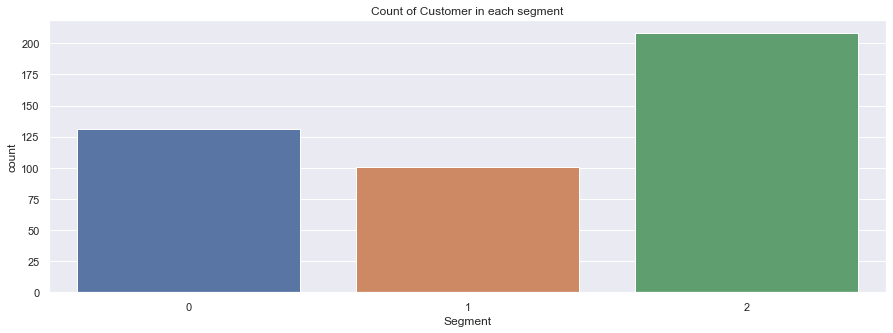

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='labels')
plt.title('Count of Customer in each segment')
plt.xlabel('Segment')
plt.show()

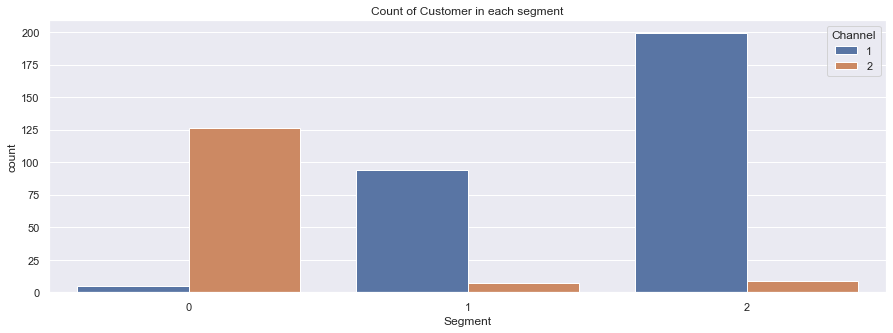

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='labels', hue='Channel')
plt.title('Count of Customer in each segment')
plt.xlabel('Segment')
plt.show()

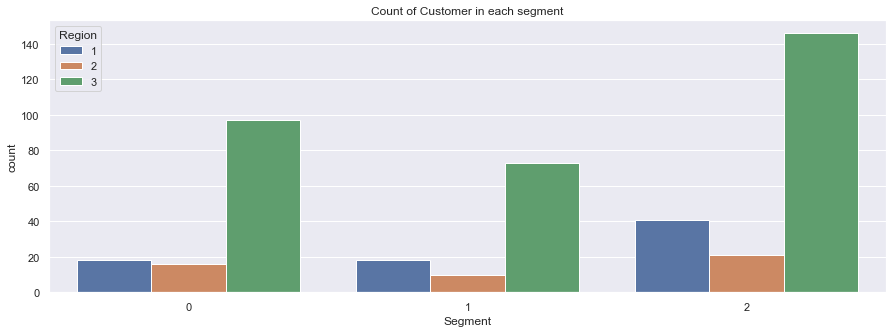

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='labels', hue='Region')
plt.title('Count of Customer in each segment')
plt.xlabel('Segment')
plt.show()

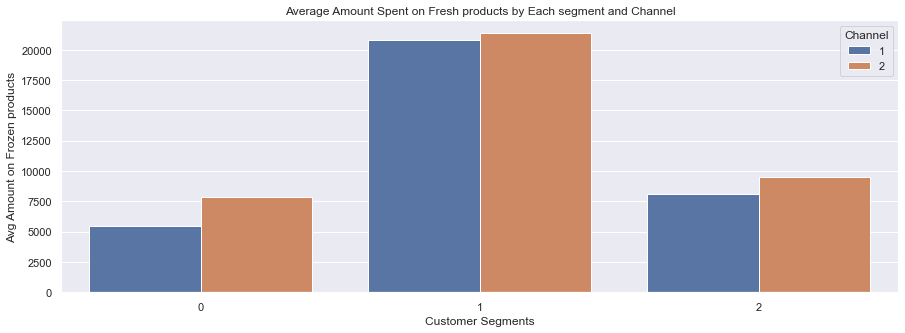

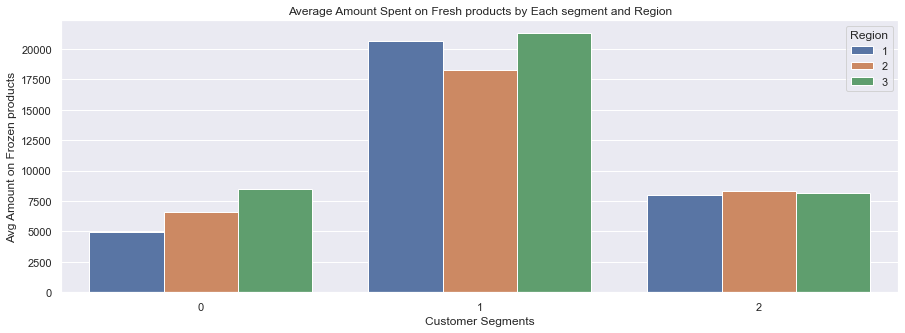

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Fresh', hue='Channel', ci=None)
plt.title('Average Amount Spent on Fresh products by Each segment and Channel')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount on Frozen products')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Fresh', hue='Region', ci=None)
plt.title('Average Amount Spent on Fresh products by Each segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount on Frozen products')
plt.show()

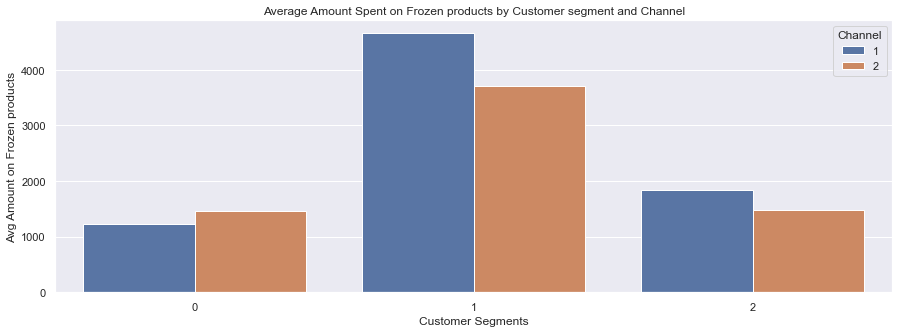

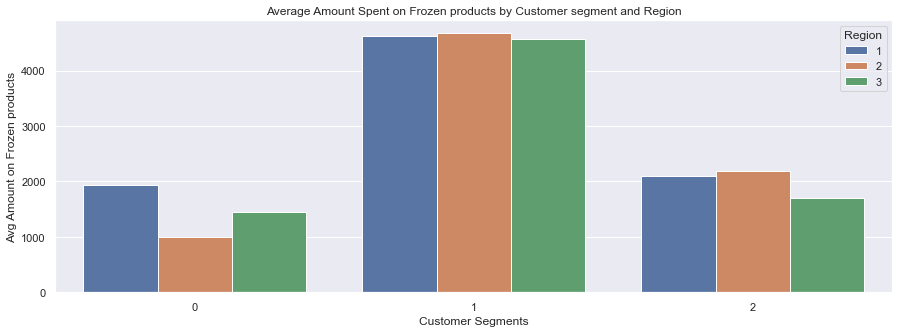

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Frozen', hue='Channel', ci=None)
plt.title('Average Amount Spent on Frozen products by Customer segment and Channel')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount on Frozen products')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Frozen', hue='Region', ci=None)
plt.title('Average Amount Spent on Frozen products by Customer segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount on Frozen products')
plt.show()

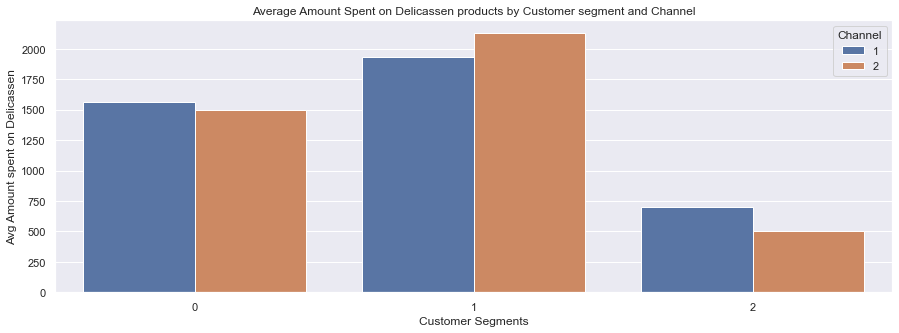

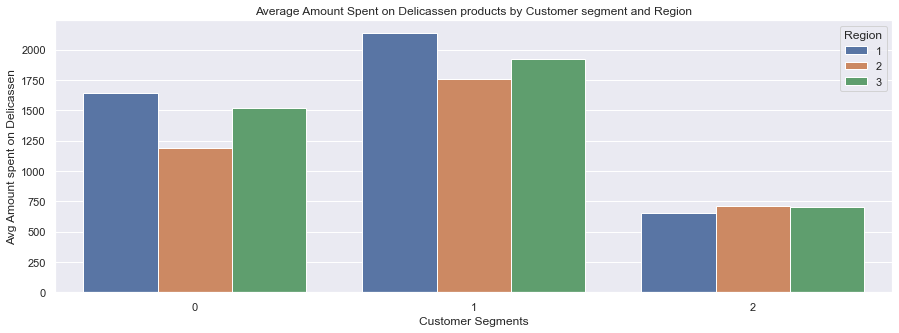

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Delicassen', hue='Channel', ci=None)
plt.title('Average Amount Spent on Delicassen products by Customer segment and Channel')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Delicassen')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Delicassen', hue='Region', ci=None)
plt.title('Average Amount Spent on Delicassen products by Customer segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Delicassen')
plt.show()

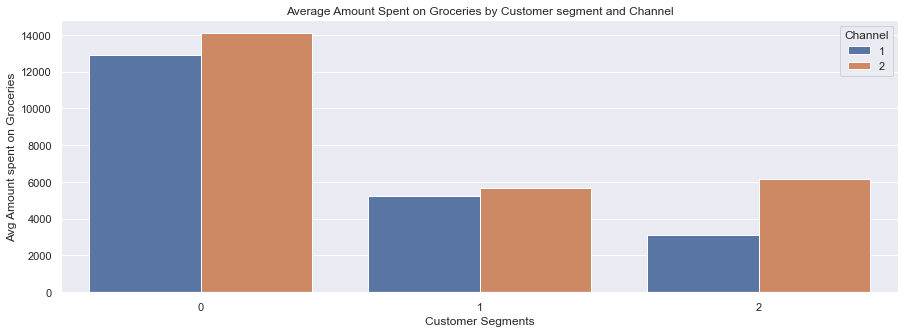

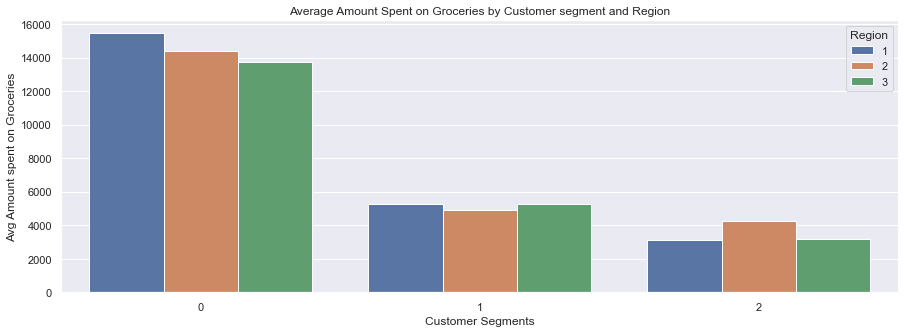

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Grocery', hue='Channel',ci=None)
plt.title('Average Amount Spent on Groceries by Customer segment and Channel')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Groceries')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Grocery', hue='Region',ci=None)
plt.title('Average Amount Spent on Groceries by Customer segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Groceries')
plt.show()

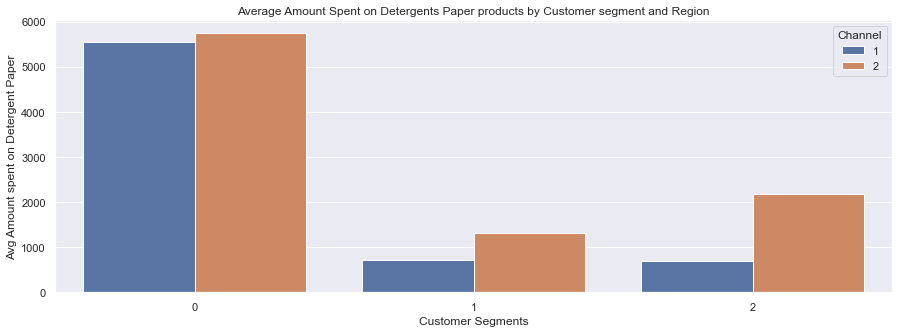

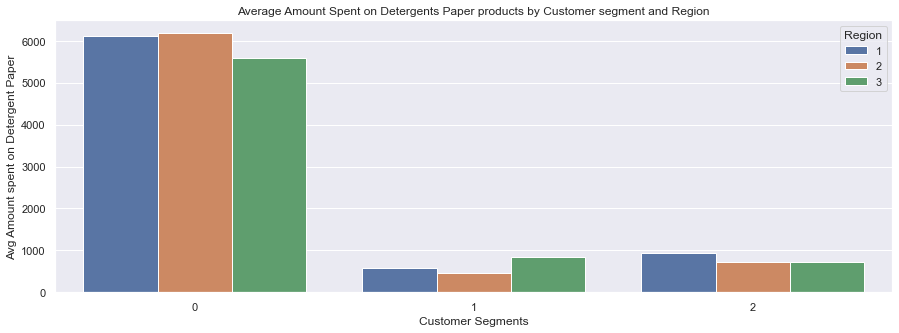

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Detergents_Paper', hue='Channel', ci=None)
plt.title('Average Amount Spent on Detergents Paper products by Customer segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Detergent Paper')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Detergents_Paper', hue='Region', ci=None)
plt.title('Average Amount Spent on Detergents Paper products by Customer segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Detergent Paper')
plt.show()

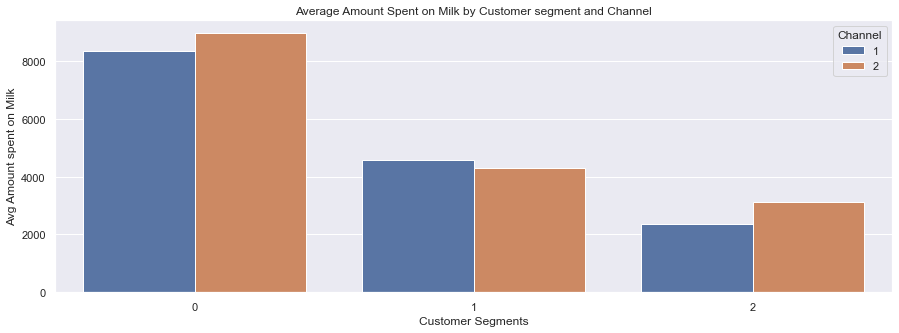

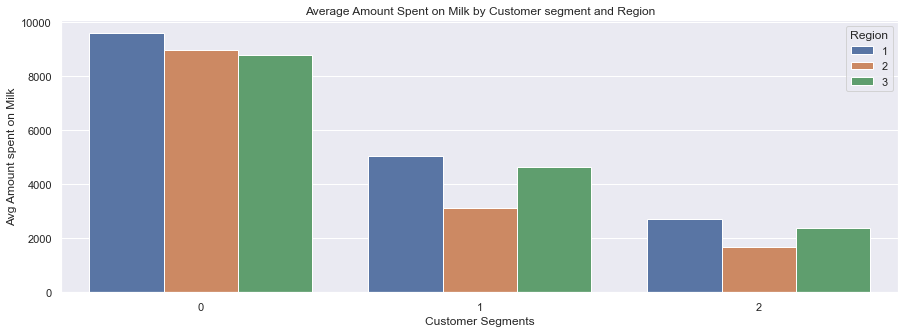

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Milk', hue ='Channel', ci=None)
plt.title('Average Amount Spent on Milk by Customer segment and Channel')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Milk')
plt.show()
plt.figure(figsize=(15,5))
sns.barplot(data=df, x= 'labels', y='Milk', hue ='Region', ci=None)
plt.title('Average Amount Spent on Milk by Customer segment and Region')
plt.xlabel('Customer Segments')
plt.ylabel('Avg Amount spent on Milk')
plt.show()

# Naming each cluster (Segment)
Now, let's come up with a name for each cluster that has been identified. In this case each cluster will be named based on the product category they spend their money on the most.

- cluster 0 will be named --> Grocery Buyers
- cluster 1 will be named --> Fresh Food Buyers
- Cluster 2 will be named --> Budget Buyers because they do not buy any food category more than both segment in any situation.

The label column that was added earlier would also be dropped to eliminate redundancy

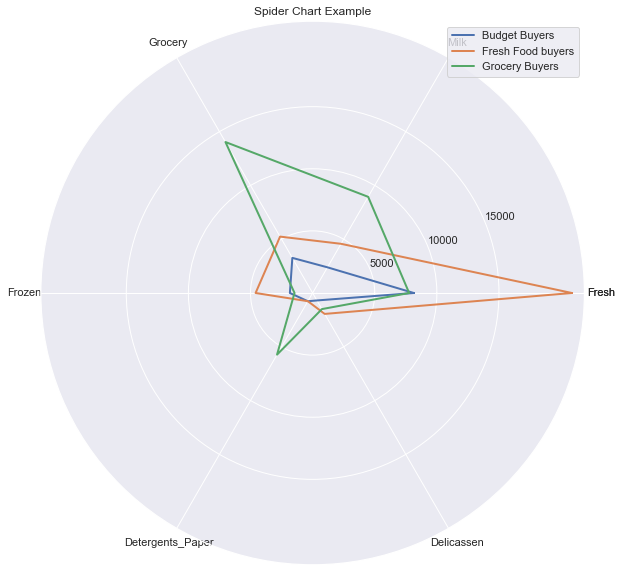

In [31]:
label_name = ['Budget Buyers' if label == 2 else 'Grocery Buyers' if label == 0 else 'Fresh Food buyers' for label in labels]
df['segment'] = label_name
gro = df.groupby('segment')[columns].mean()

# Define the labels and angles of the axes
labels = gro.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

# Repeat the first label and angle to close the circle
labels.append(labels[0])
angles = np.append(angles, angles[0])

# Plot the spider chart
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)

# Plot each row of the data
for i in range(len(gro)):
    # Get the values and add the first value to close the circle
    values = gro.iloc[i].tolist()
    values.append(values[0])

    # Plot the values as a line
    ax.plot(angles, values, linewidth=2)

# Set the labels and ticks of the axes
ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.set_yticks([5000, 10000, 15000])
ax.set_yticklabels(["5000", "10000", "15000"])

# Add a legend and a title
ax.legend(gro.index.tolist(), loc='upper right')
ax.set_title('Spider Chart Example')

# Show the plot
plt.show()


In [32]:
# Check if the name were correctly placed
display(df.head(10))
# Drop the label column
df.drop('labels', axis='columns', inplace=True)
# view the new df
display(df.head(5))
# save the new df
df.to_csv('C:/Users/DELL/Desktop/marketing projects/others/wholesale+customers/new_wholesale_customers_data.csv')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,segment
0,2,3,12669.0,9656.0,7561.0,214.00,2674.0,1338.00,0,Grocery Buyers
1,2,3,7057.0,9810.0,9568.0,1762.00,3293.0,1776.00,0,Grocery Buyers
2,2,3,6353.0,8808.0,7684.0,2405.00,3516.0,3232.25,0,Grocery Buyers
3,1,3,13265.0,1196.0,4221.0,6366.25,507.0,1788.00,1,Fresh Food buyers
4,2,3,22615.0,5410.0,7198.0,3915.00,1777.0,3232.25,1,Fresh Food buyers
5,2,3,9413.0,8259.0,5126.0,666.00,1795.0,1451.00,0,Grocery Buyers
6,2,3,12126.0,3199.0,6975.0,480.00,3140.0,545.00,2,Budget Buyers
7,2,3,7579.0,4956.0,9426.0,1669.00,3321.0,2566.00,0,Grocery Buyers
8,1,3,5963.0,3648.0,6192.0,425.00,1716.0,750.00,2,Budget Buyers
9,2,3,6006.0,11093.0,18881.0,1159.00,7425.0,2098.00,0,Grocery Buyers


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,2,3,12669.0,9656.0,7561.0,214.00,2674.0,1338.00,Grocery Buyers
1,2,3,7057.0,9810.0,9568.0,1762.00,3293.0,1776.00,Grocery Buyers
2,2,3,6353.0,8808.0,7684.0,2405.00,3516.0,3232.25,Grocery Buyers
3,1,3,13265.0,1196.0,4221.0,6366.25,507.0,1788.00,Fresh Food buyers
4,2,3,22615.0,5410.0,7198.0,3915.00,1777.0,3232.25,Fresh Food buyers


# Differences and Similarities between segments

The segments share some similarities such as:
- They all favor Region 3 store
- The all favor Channel 2 for Groceries and Detergent Paper

However they differ in the following ways:

- They differ in their product and channel preferences given the amount they spend on average on them. Segment 0 likes Channel 2 for all their products except Delicassen which they prefer Channel 1 for. Segment 1 likes Channel 1 for Frozen and Milk products, but Channel 2 for Fresh, Delicassen, Groceries and Detergent Paper. Except for Frozen and Delicassen products which Segment 2 likes Channel 1 for, they prefer Channel 2 for other types of products.
- The segments have different patterns of spending across products. For example, Segment 0 spends more on Grocery, Milk and Detergent paper. Segment 1 spends more on Fresh, Frozen and Delicassen products. Segment 2 spends more on Fresh, Grocery and Milk products.


# Recommendations,

Based on the insights, the following recommendations are made:

- Target marketing should be employed as the segments have different preferences for products and channels, Segment 0 could be tageted with promotions and discounts on Grocery, Milk and Detergent Paper products through Channel 2, as they are the most likely to purchase these items from this channel. Segment 1 could be targeted with offers on Fresh, Frozen and Delicassen products through Channel 1, as they are the most likely to purchase these items from this channel. Also, Segment 2 could be targeted with deals on Fresh, Grocery and Milk products through Channel 2, as they are the most likely to purchase these items from this channel.

- Regional Optimization Strategy should also be implemented. By using Product Placement strategies in eacg region, the marketing team can further increase market share in specific regions. Segment 0 could have more Frozen, Grocery, Milk, and Delicassen products placed in Region 1 stores, Segment 1 could have more Fresh, Grocery and Detergent paper in Region 3.Segment 2 could have more Fresh, Frozen, Grocery, and Delicassen product placed in region 2. 

- Channel optimization strategy should be implemented to improve the customer experience,  and boost revenue for each Channel. For example, Channel 2 could be optimized to drive sales for Groceries and Detergents Paper.

# Save the cleaned data

In [33]:
new_df = df.copy()
# add an index column to identify each customer transaction
index = list(range(440))
new_df['id'] = index
new_df = new_df.melt(id_vars=['id','Channel','Region','segment'], var_name='Products', value_name='Amount')
# Save to local device
new_df.to_csv('C:/Users/DELL/Desktop/marketing projects/others/wholesale+customers/customerseg_data.csv')
# Viewrows the first few 
new_df.head()

,id,Channel,Region,segment,Products,Amount
0,0,2,3,Grocery Buyers,Fresh,12669.0
1,1,2,3,Grocery Buyers,Fresh,7057.0
2,2,2,3,Grocery Buyers,Fresh,6353.0
3,3,1,3,Fresh Food buyers,Fresh,13265.0
4,4,2,3,Fresh Food buyers,Fresh,22615.0
